# Attemp to Optimize the Neural Network Model to above 75% Accuracy

## Attempt 1 Review the prepocessing

In [6]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("data/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [7]:
# Create copy of application_df for additional different data processing
original_df = application_df

In [8]:
# check shape of the data
application_df.shape

(34299, 12)

In [9]:
# Check data types
application_df.dtypes

EIN                        int64
NAME                      object
APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

In [10]:
# check for unique items in each object type
application_df.nunique()

EIN                       34299
NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

Notes: EIN is a unique none repating key for the data. This has no value so it can be dropped immediately as this does not provide any value.

In [11]:
# Drop EIN
application_df=application_df.drop("EIN",1)
application_df.head()

c:\Users\David\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


Note: Review Status and Special Consideration, they appear to be binary values.

In [12]:
# See counts for Status
application_df["STATUS"].value_counts()

1    34294
0        5
Name: STATUS, dtype: int64

In [13]:
# See special considerations
application_df["SPECIAL_CONSIDERATIONS"].value_counts()

N    34272
Y       27
Name: SPECIAL_CONSIDERATIONS, dtype: int64

Note: STATUS and SPECIAL_CONSIDERATIONS don't provide any real new information for the data since they are heavily lopsided in distribution.

In [14]:
# Drop STATUS and SPECIAL_CONSIDERATIONS
application_df=application_df.drop(["STATUS","SPECIAL_CONSIDERATIONS"],1)
application_df.head()

c:\Users\David\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,0,5000,1
1,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1-9999,108590,1
2,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,0,5000,0
3,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,6692,1
4,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,100000-499999,142590,1


In [15]:
#Get Shape and types
print(application_df.shape)
print(application_df.dtypes)

(34299, 9)
NAME                object
APPLICATION_TYPE    object
AFFILIATION         object
CLASSIFICATION      object
USE_CASE            object
ORGANIZATION        object
INCOME_AMT          object
ASK_AMT              int64
IS_SUCCESSFUL        int64
dtype: object


In [16]:
# Review names
name_freq_df = application_df["NAME"].value_counts()
name_freq_df

PARENT BOOSTER USA INC                                                  1260
TOPS CLUB INC                                                            765
UNITED STATES BOWLING CONGRESS INC                                       700
WASHINGTON STATE UNIVERSITY                                              492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                          408
                                                                        ... 
ST LOUIS SLAM WOMENS FOOTBALL                                              1
AIESEC ALUMNI IBEROAMERICA CORP                                            1
WEALLBLEEDRED ORG INC                                                      1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI       1
WATERHOUSE CHARITABLE TR                                                   1
Name: NAME, Length: 19568, dtype: int64

<AxesSubplot:ylabel='Density'>

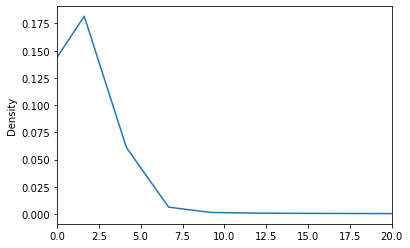

In [17]:
# density plot of name
name_freq_df.plot.density(xlim=[0,20])

Note: There are a lot of 1 time charties, but I don't want to bin by name. It would make more sense to create a new column that indicates if the charity is a common partner or a one off.

In [18]:
# Create a list of common charties
common_name=name_freq_df[name_freq_df>=10].index.tolist()

In [19]:
# Add a new column that indicates if the charity has done lots of business before
application_df["FREQUENT_CHARITY"]= application_df["NAME"].apply(lambda x: 1 if x in common_name else 0)
application_df.head()

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL,FREQUENT_CHARITY
0,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,0,5000,1,0
1,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1-9999,108590,1,0
2,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,0,5000,0,0
3,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,6692,1,0
4,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,100000-499999,142590,1,0


In [20]:
# Review Frequent Charity
application_df["FREQUENT_CHARITY"].value_counts()

0    21022
1    13277
Name: FREQUENT_CHARITY, dtype: int64

In [21]:
# Drop the names column
application_df.drop("NAME",1,inplace=True)
application_df.head()

c:\Users\David\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL,FREQUENT_CHARITY
0,T10,Independent,C1000,ProductDev,Association,0,5000,1,0
1,T3,Independent,C2000,Preservation,Co-operative,1-9999,108590,1,0
2,T5,CompanySponsored,C3000,ProductDev,Association,0,5000,0,0
3,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,6692,1,0
4,T3,Independent,C1000,Heathcare,Trust,100000-499999,142590,1,0


## Bucket the rest of the variables as needed

In [22]:
# Focus on only the object columns
application_objects=application_df.dtypes[application_df.dtypes=="object"].index.tolist()

In [23]:
# Review unique items for each object column
application_df[application_objects].nunique()

APPLICATION_TYPE    17
AFFILIATION          6
CLASSIFICATION      71
USE_CASE             5
ORGANIZATION         4
INCOME_AMT           9
dtype: int64

## Bucket application type and classification as before

In [24]:
# Review application type counts
application_type_counts=application_df["APPLICATION_TYPE"].value_counts()
application_type_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

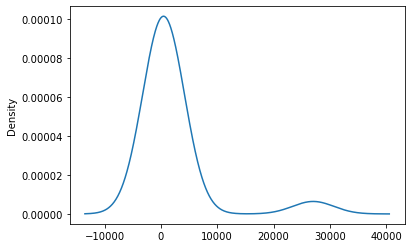

In [25]:
# Review plot density
application_type_counts.plot.density()

In [26]:
# Create a list of the low count application types
application_type_rename=application_type_counts[application_type_counts<1000].index.tolist()
application_type_rename

['T8',
 'T7',
 'T10',
 'T9',
 'T13',
 'T12',
 'T2',
 'T25',
 'T14',
 'T29',
 'T15',
 'T17']

In [27]:
# Loop through the list of low count application types and replace them with other
for type in application_type_rename:
    application_df["APPLICATION_TYPE"].replace(type,"Other",inplace=True)

In [28]:
# Verify the replace occured as planed
application_df["APPLICATION_TYPE"].value_counts()

T3       27037
Other     2266
T4        1542
T6        1216
T5        1173
T19       1065
Name: APPLICATION_TYPE, dtype: int64

## Bucket the classification category as needed

In [29]:
# Review classification counts
classification_counts = application_df["CLASSIFICATION"].value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

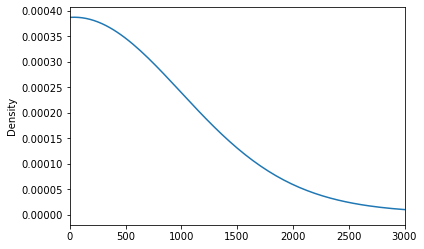

In [30]:
# density plot
classification_counts.plot.density(xlim=[0,3000])

In [31]:
# Create a list of the low count classifications
classification_rename=classification_counts[classification_counts<2500].index.tolist()

In [32]:
# Loop through the rename list
for classification in classification_rename:
    application_df["CLASSIFICATION"].replace(classification,"Other", inplace=True)

In [33]:
# Very that replace occured as planned
application_df["CLASSIFICATION"].value_counts()

C1000    17326
C2000     6074
Other     6062
C1200     4837
Name: CLASSIFICATION, dtype: int64

## Recode categorical variables

In [34]:
application_df[application_objects].shape

(34299, 6)

In [35]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Use one hot to create categorical binary columns
encode_df=pd.DataFrame(enc.fit_transform(application_df[application_objects].values.reshape(-1,6)))

encode_df.columns = enc.get_feature_names(application_objects)
encode_df.head()

c:\Users\David\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## Merge the Encoded table with the original table and drop the category columns

In [36]:
# Merge and drop
application_df =application_df.merge(encode_df,left_index=True,right_index=True).drop(application_objects,1)
application_df.head()

c:\Users\David\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,ASK_AMT,IS_SUCCESSFUL,FREQUENT_CHARITY,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,5000,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,108590,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5000,0,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6692,1,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,142590,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [37]:
# Review that all types are now numeric
len(application_df.dtypes[application_df.dtypes=="object"])

0

## Split data into features and target

In [38]:
y = application_df["IS_SUCCESSFUL"]
X = application_df.drop("IS_SUCCESSFUL",1)
print(y.shape)
print(X.shape)

(34299,)
(34299, 36)


c:\Users\David\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


# Split into training and testing sets

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)
print(X_train.shape)
print(X_test.shape)

(25724, 36)
(8575, 36)


## Scale the data

In [40]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Create the same model as before to compare to original

In [41]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
features = 36
layer_1 = 40
layer_2 = 40
output=1

In [42]:
## Create model instance
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=layer_1,input_dim=features,activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=layer_2,activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=output,activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 40)                1480      
                                                                 
 dense_1 (Dense)             (None, 40)                1640      
                                                                 
 dense_2 (Dense)             (None, 1)                 41        
                                                                 
Total params: 3,161
Trainable params: 3,161
Non-trainable params: 0
_________________________________________________________________


In [43]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [44]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 4s 3ms/step - loss: 0.5742 - accuracy: 0.7162
Epoch 2/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5522 - accuracy: 0.7285
Epoch 3/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5492 - accuracy: 0.7317
Epoch 4/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5476 - accuracy: 0.7327
Epoch 5/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5459 - accuracy: 0.7336
Epoch 6/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5451 - accuracy: 0.7339
Epoch 7/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5439 - accuracy: 0.7346
Epoch 8/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5430 - accuracy: 0.7344
Epoch 9/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5427 - accuracy: 0.7364
Epoch 10/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5418 - accura

In [45]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5534 - accuracy: 0.7322 - 445ms/epoch - 2ms/step
Loss: 0.5533720850944519, Accuracy: 0.7322449088096619


## Increase the first layer of neurons

In [46]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
features = 36
layer_1 = 80
layer_2 = 40
output=1

In [47]:
## Create model instance
nn_2 = tf.keras.models.Sequential()

# First hidden layer
nn_2.add(tf.keras.layers.Dense(units=layer_1,input_dim=features,activation="relu"))

# Second hidden layer
nn_2.add(tf.keras.layers.Dense(units=layer_2,activation="relu"))

# Output layer
nn_2.add(tf.keras.layers.Dense(units=output,activation="sigmoid"))

# Check the structure of the model
nn_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 80)                2960      
                                                                 
 dense_4 (Dense)             (None, 40)                3240      
                                                                 
 dense_5 (Dense)             (None, 1)                 41        
                                                                 
Total params: 6,241
Trainable params: 6,241
Non-trainable params: 0
_________________________________________________________________


In [48]:
# Compile the model
nn_2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [49]:
# Train the model
fit_model_2 = nn_2.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5648 - accuracy: 0.7219
Epoch 2/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5510 - accuracy: 0.7300
Epoch 3/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5484 - accuracy: 0.7315
Epoch 4/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5471 - accuracy: 0.7339
Epoch 5/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5453 - accuracy: 0.7352
Epoch 6/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5437 - accuracy: 0.7356
Epoch 7/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5436 - accuracy: 0.7363
Epoch 8/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5426 - accuracy: 0.7374
Epoch 9/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5419 - accuracy: 0.7360
Epoch 10/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5409 - accura

In [50]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5596 - accuracy: 0.7314 - 584ms/epoch - 2ms/step
Loss: 0.5595994591712952, Accuracy: 0.7314285635948181


## Go Wild, add more nuerons and another layer

In [51]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
features = 36
layer_1 = 80
layer_2 = 80
layer_3 = 80
output=1

In [52]:
## Create model instance
nn_3 = tf.keras.models.Sequential()

# First hidden layer
nn_3.add(tf.keras.layers.Dense(units=layer_1,input_dim=features,activation="relu"))

# Second hidden layer
nn_3.add(tf.keras.layers.Dense(units=layer_2,activation="relu"))

# Third hidden layer
nn_3.add(tf.keras.layers.Dense(units=layer_3,activation="relu"))
# Output layer
nn_3.add(tf.keras.layers.Dense(units=output,activation="sigmoid"))

# Check the structure of the model
nn_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 80)                2960      
                                                                 
 dense_7 (Dense)             (None, 80)                6480      
                                                                 
 dense_8 (Dense)             (None, 80)                6480      
                                                                 
 dense_9 (Dense)             (None, 1)                 81        
                                                                 
Total params: 16,001
Trainable params: 16,001
Non-trainable params: 0
_________________________________________________________________


In [53]:
# Compile the model
nn_3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [54]:
# Train the model
fit_model_3 = nn_3.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 3s 2ms/step - loss: 0.5665 - accuracy: 0.7213
Epoch 2/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5511 - accuracy: 0.7303
Epoch 3/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5487 - accuracy: 0.7318
Epoch 4/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5465 - accuracy: 0.7338
Epoch 5/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5449 - accuracy: 0.7347
Epoch 6/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5442 - accuracy: 0.7358
Epoch 7/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5432 - accuracy: 0.7360
Epoch 8/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5426 - accuracy: 0.7363
Epoch 9/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5412 - accuracy: 0.7369
Epoch 10/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5405 - accura

In [55]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_3.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5871 - accuracy: 0.7311 - 484ms/epoch - 2ms/step
Loss: 0.5870956778526306, Accuracy: 0.7310787439346313


# Rebin the names column

In [83]:
# Reset the application_df back to the orignal state
application_df=original_df
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [84]:
# Drop EIN
application_df=application_df.drop("EIN",1)
application_df.head()

c:\Users\David\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [85]:
# Drop STATUS and SPECIAL_CONSIDERATIONS
application_df=application_df.drop(["STATUS","SPECIAL_CONSIDERATIONS"],1)
application_df.head()

c:\Users\David\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,0,5000,1
1,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1-9999,108590,1
2,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,0,5000,0
3,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,6692,1
4,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,100000-499999,142590,1


In [86]:
# Loop through the list of low count application types and replace them with other
for type in application_type_rename:
    application_df["APPLICATION_TYPE"].replace(type,"Other",inplace=True)

In [87]:
# Verify the replace occured as planed
application_df["APPLICATION_TYPE"].value_counts()

T3       27037
Other     2266
T4        1542
T6        1216
T5        1173
T19       1065
Name: APPLICATION_TYPE, dtype: int64

In [88]:
# Loop through the rename list
for classification in classification_rename:
    application_df["CLASSIFICATION"].replace(classification,"Other", inplace=True)

In [89]:
# Very that replace occured as planned
application_df["CLASSIFICATION"].value_counts()

C1000    17326
C2000     6074
Other     6062
C1200     4837
Name: CLASSIFICATION, dtype: int64

## Review the name column and frequency

In [90]:
# Names
name_freq_df

PARENT BOOSTER USA INC                                                  1260
TOPS CLUB INC                                                            765
UNITED STATES BOWLING CONGRESS INC                                       700
WASHINGTON STATE UNIVERSITY                                              492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                          408
                                                                        ... 
ST LOUIS SLAM WOMENS FOOTBALL                                              1
AIESEC ALUMNI IBEROAMERICA CORP                                            1
WEALLBLEEDRED ORG INC                                                      1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI       1
WATERHOUSE CHARITABLE TR                                                   1
Name: NAME, Length: 19568, dtype: int64

<AxesSubplot:ylabel='Density'>

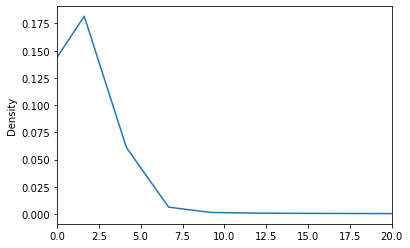

In [91]:
# density
name_freq_df.plot.density(xlim=[0,20])

In [92]:
# pull low frequency charities to rename
name_rename = name_freq_df[name_freq_df<=7].index.tolist()

In [93]:
# Group low frequency charity names as other
for name in name_rename:
    application_df["NAME"].replace(name,"Other",inplace=True)

In [94]:
# Verify replace
application_df["NAME"].value_counts()

Other                                    20494
PARENT BOOSTER USA INC                    1260
TOPS CLUB INC                              765
UNITED STATES BOWLING CONGRESS INC         700
WASHINGTON STATE UNIVERSITY                492
                                         ...  
EMMAUS CALLING INC                           8
SPIRITHORSE THERAPEUTIC RIDING CENTER        8
SOCIETY FOR CREATIVE ANACHRONISM INC         8
YOUNG PROFESSIONALS IN TRANSPORTATION        8
JAPANESE AMERICAN CITIZENS LEAGUE            8
Name: NAME, Length: 285, dtype: int64